In [15]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
print(df.head(1))
print(df.shape)

  order_id           product quantity  price            date  \
0   236670  Wired Headphones        2  11.99  08/31/19 22:21   

                            address   month  
0  359 Spruce St, Seattle, WA 98101  August  
(186305, 7)


**1) Deal with Null Values**

In [4]:
df.isna().sum()

order_id    0
product     0
quantity    0
price       0
date        0
address     0
month       0
dtype: int64

In [5]:
lst=[]
for i in df.values:
  if (i[3]=="Price Each"):
    lst.append(0)
  else:
    lst.append(int(float(i[3])))

del df['price']
df['price']=lst

print(df.head(1))

  order_id           product quantity            date  \
0   236670  Wired Headphones        2  08/31/19 22:21   

                            address   month  price  
0  359 Spruce St, Seattle, WA 98101  August     11  


**2) Number of unique orders placed so far**

In [6]:
print(len(df.groupby('order_id')))

178438


**3) Unique products in the dataset** 

In [7]:
c=1
for i in df['product'].unique():
  print(c,'.',i)
  c+=1

1 . Wired Headphones
2 . Bose SoundSport Headphones
3 . iPhone
4 . AA Batteries (4-pack)
5 . 34in Ultrawide Monitor
6 . 20in Monitor
7 . Macbook Pro Laptop
8 . LG Washing Machine
9 . 27in FHD Monitor
10 . Lightning Charging Cable
11 . Apple Airpods Headphones
12 . AAA Batteries (4-pack)
13 . USB-C Charging Cable
14 . 27in 4K Gaming Monitor
15 . ThinkPad Laptop
16 . Flatscreen TV
17 . Google Phone
18 . Vareebadd Phone
19 . Product
20 . LG Dryer


**4) Most expensive product on the line**

In [8]:
df_pr=df.sort_values(by='price', ascending=False)
print(df_pr.head(1))

       order_id             product quantity            date  \
130366   259324  Macbook Pro Laptop        1  09/29/19 13:37   

                                      address      month  price  
130366  926 North St, San Francisco, CA 94016  September   1700  


**5) From which address does the most number of orders are placed**

In [ ]:
add=[]
for i in df['address'].unique():
  add.append([i, len(df[df['address']==i])])

df_pr1=pd.DataFrame(add, columns=['Address', 'No. of times ordered'])
df_pr1=df_pr1.sort_values(by='No. of times ordered', ascending=False)
print(df_pr1.head(1))

**6) Number of orders in each month in line graph**

In [13]:
ord=[]
mon=[]
for i in df['month'].unique():
  total=0
  for j in df.values:
    if (i==j[5]):
      total+=j[6]
  ord.append(total)
  mon.append(i)
print(ord)
print(mon)

[2221405, 2781867, 2621017, 2552452, 3700449, 3359451, 4575407, 2077498, 3114751, 1797841, 3166761, 2181379]
['August', 'March', 'July', 'June', 'October', 'April', 'December', 'September', 'May', 'January', 'November', 'February']


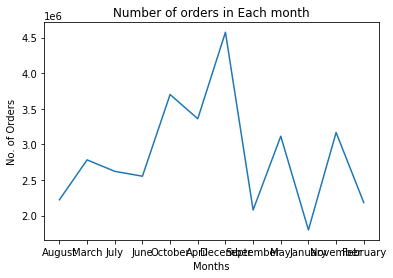

In [16]:
plt.plot(mon,ord)

plt.xlabel('Months')
plt.ylabel('No. of Orders')

plt.title('Number of orders in Each month')

plt.show()